## Atividade Gestão de Projeto

Lucas Rodrigues Lopes // RA00298509

In [86]:
#1) Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#2) Criando variaveis para guardar os data frames
cronograma = pd.read_excel('cronograma.xlsx')
display(cronograma)

custo_hora = pd.read_excel('custohora.xlsx')
display(custo_hora)

,Atividade,Responsável,S1,S2,S3,S4,S5,S6,S7,S8
0,1,A,12.0,12.0,12.0,12.0,12,12.0,12.0,12.0
1,2,B,NaN,4.0,4.0,4.0,4,4.0,4.0,4.0
2,3,C,NaN,6.0,6.0,6.0,6,NaN,NaN,NaN
3,4,C,NaN,NaN,12.0,12.0,12,12.0,NaN,NaN
4,5,G,NaN,NaN,NaN,8.0,8,8.0,NaN,NaN
5,6,F,NaN,NaN,NaN,12.0,12,12.0,NaN,NaN
6,7,B,NaN,NaN,NaN,8.0,8,8.0,8.0,NaN
7,8,G,NaN,NaN,NaN,12.0,12,12.0,12.0,12.0
8,9,C,NaN,NaN,NaN,8.0,8,8.0,8.0,8.0
9,10,B,NaN,NaN,NaN,NaN,8,8.0,8.0,8.0


,Profissional,Custo
0,A,180
1,B,120
2,C,100
3,D,100
4,E,80
5,F,80
6,G,80


In [88]:
#3) Quantidade de horas totais por semana

tabela_semanal = cronograma[['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']]
tabela_semanal = tabela_semanal.iloc[0:0]

lista_resultado = []
# Iterar sobre as colunas de interesse
for coluna in ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']:
    # Somar os valores da coluna atual
    somatorio = cronograma[coluna].sum()
    lista_resultado.append(somatorio)

# Criar um DataFrame a partir da lista_resultado
resultado_df = pd.DataFrame([lista_resultado], columns=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

# Concatenar tabela_semanal com resultado_df
tabela_semanal = pd.concat([tabela_semanal, resultado_df], ignore_index=False)
display(tabela_semanal)

,S1,S2,S3,S4,S5,S6,S7,S8
0,12.0,22.0,34.0,82.0,90,84.0,52.0,44.0


In [99]:
#4) Quantidade de horas por funcionário

# Para armazenar a contagem de horas por funcionário
contagem_horas = {}

# Iterar sobre os responsáveis únicos
for responsavel in cronograma['Responsável'].unique():
    # Filtrar o DataFrame para o responsável atual e somar as horas
    total_horas = cronograma.loc[cronograma['Responsável'] == responsavel, 'S1':'S8'].sum().sum()
    # Armazenar o total de horas no dicionário
    contagem_horas[responsavel] = total_horas
    
horas_funcionario = pd.DataFrame.from_dict(contagem_horas, orient='index', columns=['Horas'])
horas_funcionario = horas_funcionario.reset_index()
horas_funcionario = horas_funcionario.rename(columns={"index": "Profissional"})
display(horas_funcionario)

for index, row in horas_funcionario.iterrows():
    profissional = row['Profissional']
    horas = row['Horas']
    print(f'Funcionário {profissional} tem {horas} horas')

,Profissional,Horas
0,A,96.0
1,B,92.0
2,C,112.0
3,G,84.0
4,F,36.0


Funcionário A tem 96.0 horas
Funcionário B tem 92.0 horas
Funcionário C tem 112.0 horas
Funcionário G tem 84.0 horas
Funcionário F tem 36.0 horas


In [91]:
#5) Total de horas do projeto

horas_total = horas_funcionario['Horas'].sum()

print(f'O número de horas totais é de {horas_total}')

O número de horas totais é de 420.0


In [92]:
#6) Custo de mão de obra do projeto

mao_de_obra = pd.merge(custo_hora, horas_funcionario, on='Profissional', how='left')

# Calcular o custo da mão de obra (MDO) para cada profissional
mao_de_obra['Custo MDO'] = mao_de_obra['Custo'] * mao_de_obra['Horas']
display(mao_de_obra)

mao_de_obra_total = mao_de_obra['Custo MDO'].sum()
print(f'O custo de mão de obra total é de R${mao_de_obra_total:,.2f}')

,Profissional,Custo,Horas,Custo MDO
0,A,180,96.0,17280.0
1,B,120,92.0,11040.0
2,C,100,112.0,11200.0
3,D,100,NaN,NaN
4,E,80,NaN,NaN
5,F,80,36.0,2880.0
6,G,80,84.0,6720.0


O custo de mão de obra total é de R$49,120.00


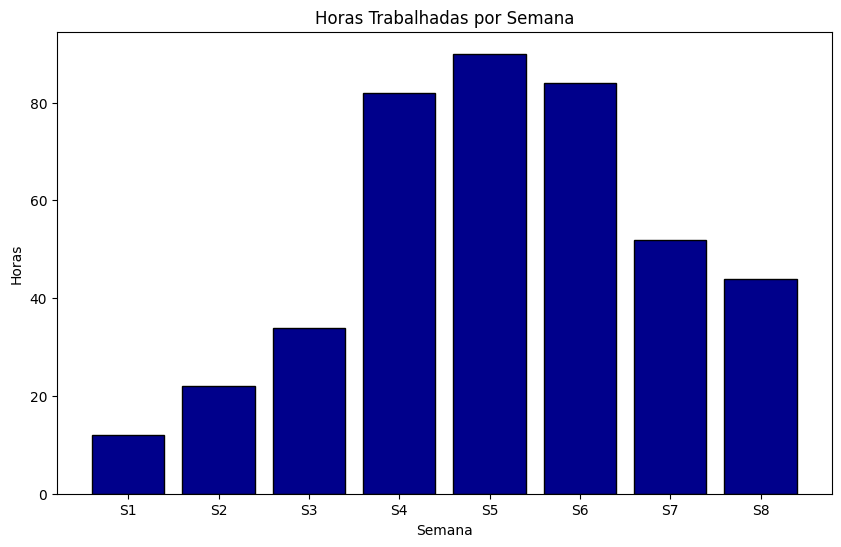

In [97]:
#7) Histograma dos totais + Horas semanais

# Transpor os dados para ter duas colunas
tabela_transposta = tabela_semanal.melt(var_name='Semana', value_name='Horas')
# Exibir o DataFrame resultante
# display(tabela_transposta)

# Criar o histograma
plt.figure(figsize=(10, 6))
#                   x                           y
plt.bar(tabela_transposta['Semana'], tabela_transposta['Horas'], color='darkblue', edgecolor='black')

# Adicionar título e rótulos
plt.title('Horas Trabalhadas por Semana')
plt.xlabel('Semana')
plt.ylabel('Horas')

# Exibir o gráfico
plt.show()